# Handwritten Digits Recognition using ANN and CNN

MNIST Handwritten Digits dataset which contains 60,000 images for training and 10,000 images for testing, was used for classification 

Artificial Neural Network (ANN) and Convolutional Neural Network (CNN) models were implemented and applied on the dataset

#### Importing required libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\FIX\anaconda3\envs\AI\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\FIX\anaconda3\envs\AI\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\FIX\anaconda3\envs\AI\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\FIX\anaconda3\envs\AI\lib\site-packages\tensorflow\python\framework\dtypes.py:4

#### Loading the MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

#### Normalizing the images of the MNIST dataset

In [3]:
train_images, test_images = train_images/255.0, test_images/255.0

#### Shape of the images and labels of training and testing

In [4]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

#### Visualizing some of the images of the MNIST dataset with labels

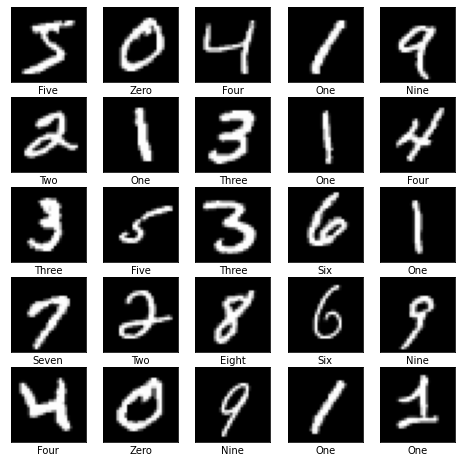

In [5]:
Labels = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

plt.figure(figsize = (8,8))
for i in range (25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap = plt.cm.gray)
    plt.xlabel(Labels[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

### Evaluating the CNN model's performance

#### Creating the CNN model

In [6]:
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), input_shape = (28, 28, 1), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (2,2), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (2,2), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation = 'sigmoid'),
    tf.keras.layers.Dense(100, activation = 'sigmoid'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Reshaping the dimension of input images to (28, 28, 1)

In [7]:
train_images_new = train_images.reshape(-1, 28, 28, 1)
test_images_new = test_images.reshape(-1, 28, 28, 1)

#### Running the CNN model

In [8]:
results_cnn = model_cnn.fit(train_images_new, train_labels, epochs = 20, batch_size = 1000, validation_data = (test_images_new, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 121s - loss: 1.2339 - acc: 0.6686 - val_loss: 0.4207 - val_acc: 0.9052
Epoch 2/20
60000/60000 [==============================] - 94s - loss: 0.2797 - acc: 0.9317 - val_loss: 0.1737 - val_acc: 0.9570
Epoch 3/20
60000/60000 [==============================] - 88s - loss: 0.1504 - acc: 0.9609 - val_loss: 0.1153 - val_acc: 0.9709
Epoch 4/20
60000/60000 [==============================] - 92s - loss: 0.1070 - acc: 0.9724 - val_loss: 0.0876 - val_acc: 0.9759
Epoch 5/20
60000/60000 [==============================] - 96s - loss: 0.0850 - acc: 0.9771 - val_loss: 0.0743 - val_acc: 0.9800
Epoch 6/20
60000/60000 [==============================] - 96s - loss: 0.0692 - acc: 0.9819 - val_loss: 0.0593 - val_acc: 0.9833
Epoch 7/20
60000/60000 [==============================] - 92s - loss: 0.0592 - acc: 0.9843 - val_loss: 0.0560 - val_acc: 0.9835
Epoch 8/20
60000/60000 [=============================

#### Visualizing the results of the CNN

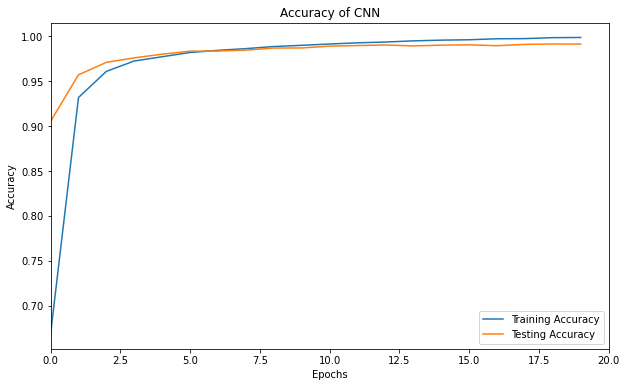

In [9]:
plt.figure(figsize = (10, 6))
plt.plot(results_cnn.history['acc'], label ='Training Accuracy')
plt.plot(results_cnn.history['val_acc'], label = 'Testing Accuracy')
plt.title("Accuracy of CNN")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([0, 20])
plt.legend(loc = 'lower right')
plt.show()

### Evaluating the ANN model's performance

#### Creating the ANN model

In [10]:
model_ann = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(200, activation = 'sigmoid'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Running the ANN model

In [11]:
results_ann = model_ann.fit(train_images, train_labels, epochs = 20, batch_size = 1000, validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s - loss: 1.1858 - acc: 0.7406 - val_loss: 0.6214 - val_acc: 0.8718
Epoch 2/20
60000/60000 [==============================] - 4s - loss: 0.5111 - acc: 0.8801 - val_loss: 0.4118 - val_acc: 0.9008
Epoch 3/20
60000/60000 [==============================] - 3s - loss: 0.3844 - acc: 0.9005 - val_loss: 0.3397 - val_acc: 0.9105
Epoch 4/20
60000/60000 [==============================] - 3s - loss: 0.3292 - acc: 0.9106 - val_loss: 0.3014 - val_acc: 0.9173
Epoch 5/20
60000/60000 [==============================] - 3s - loss: 0.2967 - acc: 0.9187 - val_loss: 0.2765 - val_acc: 0.9223
Epoch 6/20
60000/60000 [==============================] - 3s - loss: 0.2729 - acc: 0.9241 - val_loss: 0.2603 - val_acc: 0.9256
Epoch 7/20
60000/60000 [==============================] - 3s - loss: 0.2548 - acc: 0.9288 - val_loss: 0.2450 - val_acc: 0.9314
Epoch 8/20
60000/60000 [==============================] - 3s 

#### Visualizing the results of the ANN

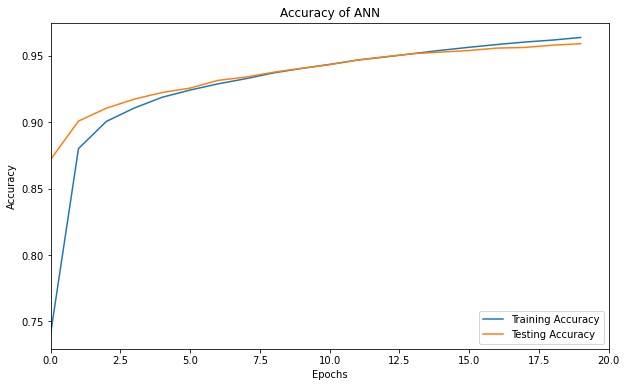

In [13]:
plt.figure(figsize = (10, 6))
plt.plot(results_ann.history['acc'], label ='Training Accuracy')
plt.plot(results_ann.history['val_acc'], label = 'Testing Accuracy')
plt.title("Accuracy of ANN")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([0, 20])
plt.legend(loc = 'lower right')
plt.show()